ДОМАШНЕЕ ЗАДАНИЕ 6 №2
Метод главных компонент
Урзов Александр Николаевич
НПМбд-02-20

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

Загрузим датасет с изображением рукописных цифр

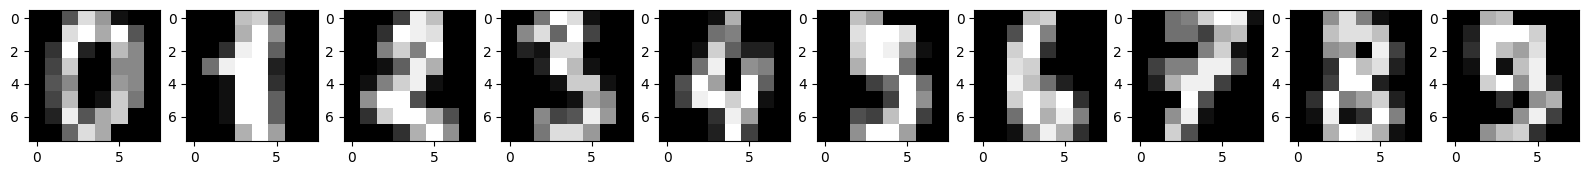

In [31]:
digits = load_digits()
fig, ax = plt.subplots(1,10, figsize =(20,20))
for i in range(10):
    ax[i].imshow(digits.images[i], cmap = 'gray')
X = digits['data']
labels = digits['target']

II. Алгоритм PCA

4 шага метода главных компонент:

1. Центрирование данных;
2. Вычисление матрицы ковариации;
3. Вычисление собственных векторов F и значений матрицы ковариации;
4. Преобразование данных в координаты в базисе главных компонент.

In [22]:
class PCA():

    def __init__(self, n_components=None):
        self.n_components = n_components
    
    def fit(self, X):
        X1 = X
        m = np.mean(X1, axis = 0)
        X1 -= m
        C = X1.T.dot(X1)
        l, F = np.linalg.eigh(C)
        l = l[::-1]
        F = F[:, ::-1]
        # _, S, Vh = np.linalg.svd(C, full_matrices = False)
        # F1, l1 = Vh.T, S
        return X1, F, l
        
    def transform(self, X, F):
        Y = X.dot(F)
        return Y

    def fit_transform(self, X):
        X_c, F, _ = self.fit(X)
        Y = self.transform(X_c, F)
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        return Y
    
test = PCA(2)

Заметим, что собственные значения уже упорядочены в порядке убывания. 
Построем график собственных значений и график отношения кумулятивной суммы к их полной сумме.

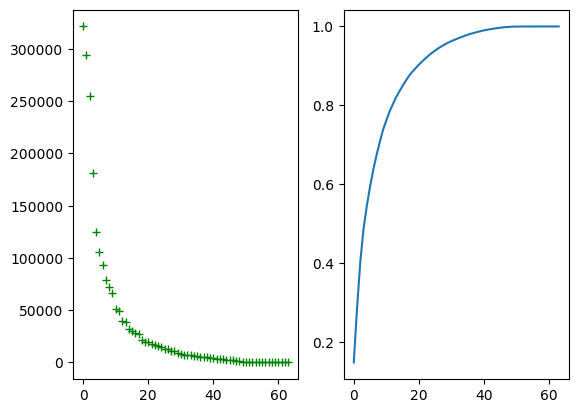

In [23]:
_, _, l = test.fit(X)
plt.subplot(1,2,1)
plt.plot(l, marker = '+', linestyle = '', color='green')
plt.subplot(1,2,2)
plt.plot(np.cumsum(l) / np.sum(l))

Изобразим точки нашего датасета на графике. Для этого оставим только 2 главные координаты. 
Заметим, что разным цифрам соответсвуют разные цвета

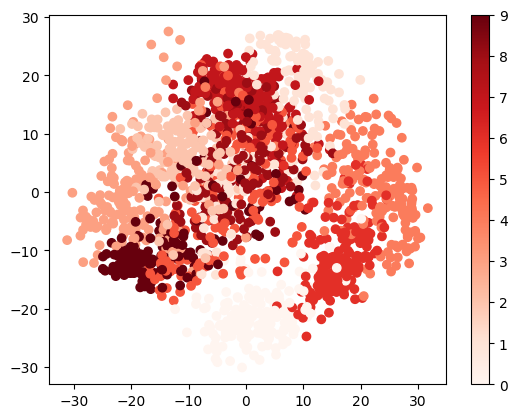

In [24]:
Y = test.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c = labels, cmap='Reds')
plt.colorbar()

III. Алгоритм kNN в виде класса

1. Метод init() необходим для сохранения количества соседей, по умолчанию их 5.

2. Метод fit() - сохрянение обучающих данных.

3. Метод predict() - вычисление возможного класса тестируемого объекта. Для данных вычислений необходимо знать расстояние от исследуемой точки до точек в обучающей базе.
После этого находим k ближайших точек и смотрим, к какому классу они принадлежат. Класс, к которому принадлежит большее число соседей, и будет классом, к которому принадлежит необходимая точка.

In [25]:
class kNN():
    
    def __init__(self, n_neighbours = 5):
        self.n_neighbours = n_neighbours
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        predict_class = list()
        for item in X: 
            point_dist = list() 
            for j in range(len(self.X_train)): #считаем расстояние от точки до каждого элемента
                dist = np.sqrt(np.sum((np.array(self.X_train[j]) - np.array(item)) ** 2)) 
                point_dist.append(dist)
            point_dist = np.array(point_dist)
            #вычисляем индексы первых k минимальных расстояний
            min_dist_arg = np.argsort(point_dist)[:self.n_neighbours] 
            min_dist_labels = list()
            for i in min_dist_arg: #находим соответсвующие лэйблы к этим соседям
                min_dist_labels.append(self.y_train[i]) #вычисляем уникальные метки и их число
            values, counts = np.unique(min_dist_labels, return_counts = True) #ищем метку с максимальных числом вхождений
            possible_label = values[np.argmax(counts)]
            predict_class.append(possible_label)
        return predict_class

Посмотрим на точность вычислений при разных количесвах соседей и разном количестве главных компонент

In [26]:
#Без изменения через PCA

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 1500, random_state=42)
test_k_2 = kNN(2)
test_k_2.fit(X_train, y_train)
y_out_k_2 = test_k_2.predict(X_test)
print("Точность при k = 2:", accuracy_score(y_test, y_out_k_2) * 100)
test_k_5 = kNN()
test_k_5.fit(X_train, y_train)
y_out_k_5 = test_k_5.predict(X_test)
print("Точность при k = 5:", accuracy_score(y_test, y_out_k_5) * 100)
test_k_7 = kNN(7)
test_k_7.fit(X_train, y_train)
y_out_k_7 = test_k_7.predict(X_test)
print("Точность при k = 7:", accuracy_score(y_test, y_out_k_7) * 100)
test_k_15 = kNN(15)
test_k_15.fit(X_train, y_train)
y_out_k_15 = test_k_15.predict(X_test)
print("Точность при k = 15:", accuracy_score(y_test, y_out_k_15) * 100)
test_k_30 = kNN(30)
test_k_30.fit(X_train, y_train)
y_out_k_30 = test_k_30.predict(X_test)
print("Точность при k = 30:", accuracy_score(y_test, y_out_k_30) * 100)


Точность при k = 2: 94.86666666666666
Точность при k = 5: 94.73333333333333
Точность при k = 7: 93.60000000000001
Точность при k = 15: 91.26666666666667
Точность при k = 30: 86.33333333333333


In [27]:
#10 главных компонент

test = PCA(10)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = kNN(2)
test_k_2.fit(X_train, y_train)
y_out_k_2 = test_k_2.predict(X_test)
print("Точность при k = 2:", accuracy_score(y_test, y_out_k_2) * 100)
test_k_5 = kNN()
test_k_5.fit(X_train, y_train)
y_out_k_5 = test_k_5.predict(X_test)
print("Точность при k = 5:", accuracy_score(y_test, y_out_k_5) * 100)
test_k_7 = kNN(7)
test_k_7.fit(X_train, y_train)
y_out_k_7 = test_k_7.predict(X_test)
print("Точность при k = 7:", accuracy_score(y_test, y_out_k_7) * 100)
test_k_15 = kNN(15)
test_k_15.fit(X_train, y_train)
y_out_k_15 = test_k_15.predict(X_test)
print("Точность при k = 15:", accuracy_score(y_test, y_out_k_15) * 100)
test_k_30 = kNN(30)
test_k_30.fit(X_train, y_train)
y_out_k_30 = test_k_30.predict(X_test)
print("Точность при k = 30:", accuracy_score(y_test, y_out_k_30) * 100)

Точность при k = 2: 93.53333333333333
Точность при k = 5: 91.86666666666666
Точность при k = 7: 91.66666666666666
Точность при k = 15: 89.2
Точность при k = 30: 86.93333333333332


In [28]:
#15 главныx компонент

test = PCA(15)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = kNN(2)
test_k_2.fit(X_train, y_train)
y_out_k_2 = test_k_2.predict(X_test)
print("Точность при k = 2:", accuracy_score(y_test, y_out_k_2) * 100)
test_k_5 = kNN()
test_k_5.fit(X_train, y_train)
y_out_k_5 = test_k_5.predict(X_test)
print("Точность при k = 5:", accuracy_score(y_test, y_out_k_5) * 100)
test_k_7 = kNN(7)
test_k_7.fit(X_train, y_train)
y_out_k_7 = test_k_7.predict(X_test)
print("Точность при k = 7:", accuracy_score(y_test, y_out_k_7) * 100)
test_k_15 = kNN(15)
test_k_15.fit(X_train, y_train)
y_out_k_15 = test_k_15.predict(X_test)
print("Точность при k = 15:", accuracy_score(y_test, y_out_k_15) * 100)
test_k_30 = kNN(30)
test_k_30.fit(X_train, y_train)
y_out_k_30 = test_k_30.predict(X_test)
print("Точность при k = 30:", accuracy_score(y_test, y_out_k_30) * 100)

Точность при k = 2: 94.93333333333334
Точность при k = 5: 94.06666666666666
Точность при k = 7: 93.13333333333334
Точность при k = 15: 90.73333333333333
Точность при k = 30: 87.46666666666667


Посмотрим на точность выборке соседей через построенный график

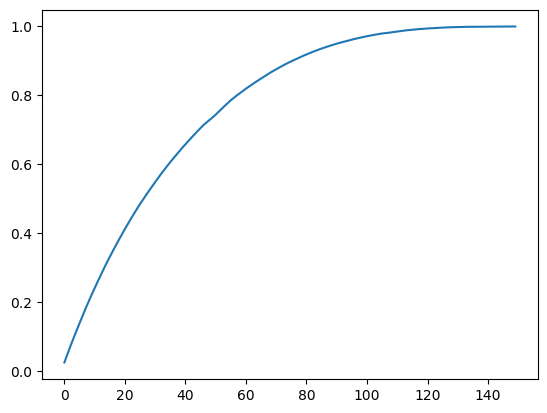

In [29]:
A = np.random.randn(150,150)
l, _ = np.linalg.eig(A.dot(A.T))
plt.plot(np.cumsum(l) / np.sum(l))

ВЫВОДЫ ПО ЛАБОРАТОРНОЙ РАБОТЕ №6:

Познакомилась с методом главных компонент. Реализовала метод главных компонент, который позволяет выделять наиболее существенную информацию из данных с помощью линейных преобразований и с помощью него и алгоритма k-ближайших соседей решить задачу распознавания рукописных цифр!

Наибольшую точность я получил при наименьшем k = 2 (вне зависимости от числа главных компонент).